## Analysis of Lewd Conduct Calls

by Stacy Montemayor

An examination of how longer time deltas between when the complaint was received and when an officer arrived on scene affects outcomes of lewd conduct calls.

In [25]:
import pandas as pd
import numpy as np
from pySankey import sankey
from ipysankeywidget import SankeyWidget
from floweaver import *

In [2]:
%matplotlib inline

### Import cleaned data

In [3]:
%run import_clean_call_data.ipynb

### Analysis

In [4]:
# Bad sankey widget - coul dnot get to work
links = [
    {'source': 'start', 'target': 'A', 'value': 2},
    {'source': 'A', 'target': 'B', 'value': 2},
    {'source': 'C', 'target': 'A', 'value': 2},
    {'source': 'A', 'target': 'C', 'value': 2},
]
w = SankeyWidget(links=links, margins=dict(top=0, bottom=0, left=50, right=100))

Cleaning requirements: 
- remove all but lewd conduct calls
- figure out how to determine if they're happening currently-ish
- Create ~5 time buckets
- Flow each precinct into a time bucket
- Then flow into how event was cleared


What I want to see: 
scatterplot of timedelta by precinct  
time deltas by precinct

In [5]:
# Create dataframe that will contain all lewd conduct calls 
lewd_conduct_df = pd.DataFrame(data)

# Create dataframe containing only lewd conduct calls
lewd_conduct_df = lewd_conduct_df[is_lewd_conduct]

In [6]:
lewd_conduct_df.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,Lewd Conduct,2010-02-27 22:54:25,2010-02-27 22:55:45,North,UNION,U1,80,2010,2,no,no,other sex crime
2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-01-02 00:37:29,2010-01-02 00:42:16,West,DAVID,D2,287,2010,1,no,no,other sex crime
2010000001213,ASSISTANCE RENDERED,ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,Lewd Conduct,2010-01-02 00:51:02,2010-01-02 00:51:03,West,DAVID,D2,1,2010,1,no,no,other sex crime
2010000001517,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-01-02 11:14:25,2010-01-02 11:35:16,East,EDWARD,E1,1251,2010,1,no,no,other sex crime
2010000002053,REPORT WRITTEN (NO ARREST),ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,Lewd Conduct,2010-01-02 21:15:49,2010-01-02 21:15:49,North,BOY,B3,0,2010,1,no,no,other sex crime


In [7]:
# Remove onviews
lewd_conduct_df = lewd_conduct_df[lewd_conduct_df.call_type != 'ONVIEW']

# Remove calls with unknown precicnt
lewd_conduct_df = lewd_conduct_df[lewd_conduct_df.precinct != 'Unknown']
lewd_conduct_df.shape

(5045, 16)

In [8]:
# Show calls with bad time_deltas
neg_timedeltas_df = lewd_conduct_df[lewd_conduct_df.time_delta < 0]
neg_timedeltas_df

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000098804,ASSISTANCE RENDERED,911,2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),Lewd Conduct,2010-03-26 06:11:46,1900-01-01,North,NORA,N1,-3478572706,2010,3,no,no,other sex crime
2010000125984,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-04-18 11:26:05,1900-01-01,North,NORA,N3,-3480578765,2010,4,no,no,other sex crime
2010000147817,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,FOLLOW UP,Lewd Conduct,2010-05-06 13:16:51,1900-01-01,East,EDWARD,E2,-3482140611,2010,5,no,no,other sex crime
2010000226716,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-07-03 18:17:35,1900-01-01,North,BOY,B3,-3487169855,2010,7,no,no,other sex crime
2010000259418,FOLLOW-UP REPORT MADE,"TELEPHONE OTHER, NOT 911",3,FOLLOW UP,Lewd Conduct,2010-07-27 17:23:28,1900-01-01,North,NORA,N2,-3489240208,2010,7,no,no,other sex crime
2010000264654,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),Lewd Conduct,2010-07-31 13:24:42,1900-01-01,North,BOY,B1,-3489571482,2010,7,no,no,other sex crime
2010000295455,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),Lewd Conduct,2010-08-24 01:01:11,1900-01-01,North,NORA,N3,-3491600471,2010,8,no,no,other sex crime
2010000364738,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-10-18 16:54:38,1900-01-01,West,DAVID,D2,-3496409678,2010,10,no,no,other sex crime
2010000386210,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",Lewd Conduct,2010-11-04 21:13:57,1900-01-01,North,BOY,B1,-3497894037,2010,11,no,no,other sex crime


In [9]:
# Remove calls with bad time_delta
lewd_conduct_df = lewd_conduct_df[lewd_conduct_df.time_delta > 0]

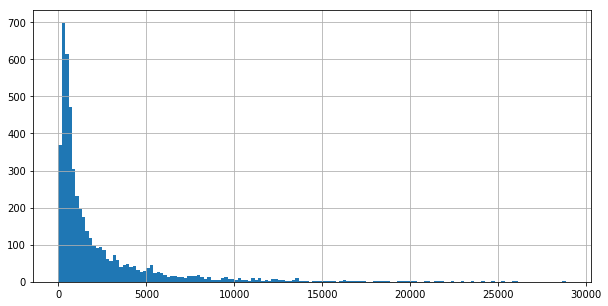

In [10]:
# View distribution of time_delta
time_delta = lewd_conduct_df.time_delta

time_delta.hist(bins=150, figsize=(10,5))

In [11]:
# Add bins for time_deltas

bins = [0, 300, 600, 1200, 2400, 4800, 9600, np.inf]
names = ['<5min', '5-10min', '10-20min', '20-40min', '40-80min', '80-160min', '160+min']

lewd_conduct_df['timedelta_ranges'] = pd.cut(lewd_conduct_df['time_delta'], bins, labels=names)

In [8]:
# Export csv of df for Tableau attempt.
lewd_conduct_df.to_csv('lewd_conduct_df.csv', index=True)

In [79]:
#The widget requires an edgelist with source, target and value columns
# dfm=pd.melt(df,id_vars=['DESTINATION','Region'], var_name='source', value_name='value')
# dfm.columns=['DESTINATION','target','source','value']
# dfm['target']=dfm['target']+'_'

# lewd_conduct_dfm = pd.melt(lewd_conduct_df, id_vars=['precinct'])

## pySankey Effort

In [80]:
# colorDict = {
#     'apple':'#f71b1b',
#     'blueberry':'#1b7ef7',
#     'banana':'#f3f71b',
#     'lime':'#12e23f',
#     'orange':'#f78c1b'
# }
# sankey(
#     df['true'], df['predicted'], aspect=20, colorDict=colorDict,
#     fontsize=12, figureName="fruit"
# )

In [81]:
# colorDict = {
#     'North': '#f71b1b',
#     'South': '#1b7ef7',
#     'East': '#f3f71b',
#     'West': '#12e23f',
#     'Southwest':'#f78c1b'
# }

# sankey.sankey(
#     lewd_conduct_df['precinct'], lewd_conduct_df['event_clearing'], aspect=20,
#     colorDict=colorDict, fontsize=12, figure_name='clearing'
# )

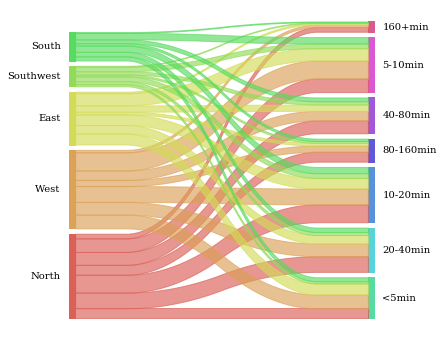

In [12]:
# Sankey showing event clearing by timedelta_range
sankey.sankey(
    left=lewd_conduct_df['precinct'], right=lewd_conduct_df['timedelta_ranges'],
    aspect=20, fontsize=10, figure_name='clearing'
)

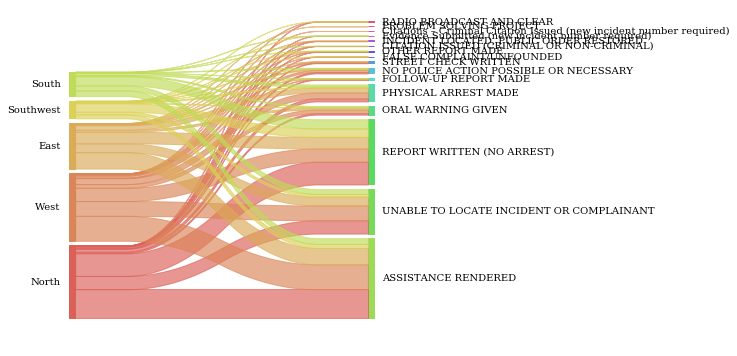

In [13]:
# Sankey showing event clearing by precinct
sankey.sankey(
    left=lewd_conduct_df['precinct'], right=lewd_conduct_df['event_clearing'],
    aspect=20, fontsize=10, figure_name='clearing'
)

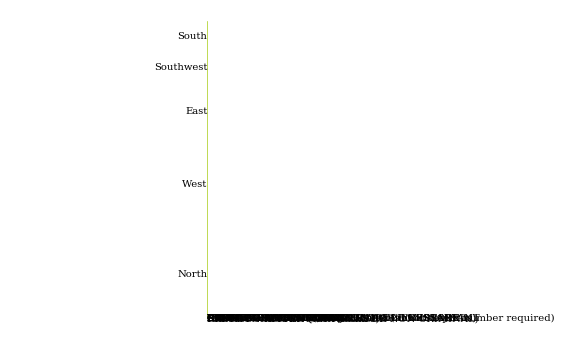

In [14]:

sankey.sankey(
    left=lewd_conduct_df['precinct'], right=lewd_conduct_df['event_clearing'], rightWeight=lewd_conduct_df['time_delta'],
    aspect=20, fontsize=10, figure_name='clearning'
)

## Floweaver Sankey

In [51]:
# Create df for floweaver sankey using only needed columns
floweaver_lewd_df = lewd_conduct_df[['precinct','time_delta','event_clearing','timedelta_ranges']]
floweaver_lewd_df.head()

,precinct,time_delta,event_clearing,timedelta_ranges
CAD Event Number,,,,
2010000066820,North,80,ASSISTANCE RENDERED,<5min
2010000001201,West,287,ASSISTANCE RENDERED,<5min
2010000001517,East,1251,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,20-40min
2010000004224,Southwest,747,REPORT WRITTEN (NO ARREST),10-20min
2010000006248,North,4872,REPORT WRITTEN (NO ARREST),80-160min


In [52]:
floweaver_lewd_df.event_clearing.unique()

array(['ASSISTANCE RENDERED', 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT',
       'REPORT WRITTEN (NO ARREST)', 'ORAL WARNING GIVEN',
       'PHYSICAL ARREST MADE', 'FOLLOW-UP REPORT MADE',
       'NO POLICE ACTION POSSIBLE OR NECESSARY', 'STREET CHECK WRITTEN',
       'FALSE COMPLAINT/UNFOUNDED', 'OTHER REPORT MADE',
       'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
       'INCIDENT LOCATED, PUBLIC ORDER RESTORED',
       'Evidence Submitted (new incident number required)',
       'Citations – Criminal Citation Issued (new incident number required)',
       'PROBLEM SOLVING PROJECT', 'RADIO BROADCAST AND CLEAR'],
      dtype=object)

In [53]:
# Rename columns for floweaver
floweaver_lewd_df.rename(columns={'precinct':'source','event_clearing': 'target'})
floweaver_lewd_df.head()

,precinct,time_delta,event_clearing,timedelta_ranges
CAD Event Number,,,,
2010000066820,North,80,ASSISTANCE RENDERED,<5min
2010000001201,West,287,ASSISTANCE RENDERED,<5min
2010000001517,East,1251,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,20-40min
2010000004224,Southwest,747,REPORT WRITTEN (NO ARREST),10-20min
2010000006248,North,4872,REPORT WRITTEN (NO ARREST),80-160min


In [54]:
# Set default size
size = dict(width=570, height=300)

# Define nodes
nodes = {
    'precinct': ProcessGroup(['North','East','West','South','Southwest']),
    'event_clearing': ProcessGroup(['ASSISTANCE RENDERED', 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT',
                                    'REPORT WRITTEN (NO ARREST)', 'ORAL WARNING GIVEN',
                                    'PHYSICAL ARREST MADE', 'FOLLOW-UP REPORT MADE',
                                    'NO POLICE ACTION POSSIBLE OR NECESSARY', 'STREET CHECK WRITTEN',
                                    'FALSE COMPLAINT/UNFOUNDED', 'OTHER REPORT MADE',
                                    'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
                                    'INCIDENT LOCATED, PUBLIC ORDER RESTORED',
                                    'Evidence Submitted (new incident number required)',
                                    'Citations – Criminal Citation Issued (new incident number required)',
                                    'PROBLEM SOLVING PROJECT', 'RADIO BROADCAST AND CLEAR'])
}

In [55]:
# Order nodes
ordering = [
    ['precinct'],
    ['event_clearing'],
]

In [56]:
# Identify connections
bundles = [
    Bundle('precinct','event_clearing'),
]

In [57]:
# Put it all together and show sankey
sdd = SankeyDefinition(nodes, bundles, ordering)

weave(sdd, floweaver_lewd_df).to_widget(**size)

KeyError: 'source'

In [58]:
# Partition the precincts

all_precincts = Partition.Simple('process',[
    'North',
    'West',
    'East',
    'Southwest',
    'South'
])

# Partition the clearing codes
clearing_codes = Partition.Simple('process', [
    'ASSISTANCE RENDERED', 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT',
    'REPORT WRITTEN (NO ARREST)', 'ORAL WARNING GIVEN',
    'PHYSICAL ARREST MADE', 'FOLLOW-UP REPORT MADE',
    'NO POLICE ACTION POSSIBLE OR NECESSARY', 'STREET CHECK WRITTEN',
    'FALSE COMPLAINT/UNFOUNDED', 'OTHER REPORT MADE',
    'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
    'INCIDENT LOCATED, PUBLIC ORDER RESTORED',
    'Evidence Submitted (new incident number required)',
    'Citations – Criminal Citation Issued (new incident number required)',
    'PROBLEM SOLVING PROJECT', 'RADIO BROADCAST AND CLEAR'
])

# Update the ProcessGroup nodes to use the partitions
nodes['precinct'].partition = all_precincts
nodes['event_clearing'].partition = clearing_codes

# New Sankey!
weave(sdd, floweaver_lewd_df).to_widget(**size)

KeyError: 'source'

## Sankey for all calls cleared UTL

In [15]:
# Create df containing only calls cleared unable to locate
lewd_utl_df = lewd_conduct_df[lewd_conduct_df.event_clearing == 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT']

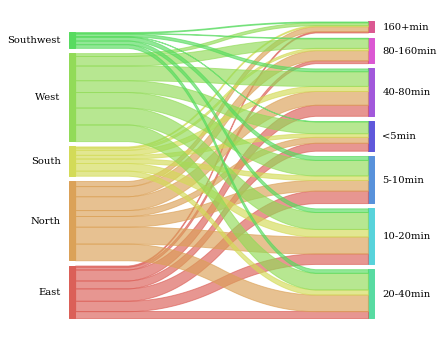

In [16]:
# Sankey showing event clearing by timedelta_range for calls cleared UTL
sankey.sankey(
    left=lewd_utl_df['precinct'], right=lewd_utl_df['timedelta_ranges'],
    aspect=20, fontsize=10, figure_name='clearing'
)